In [1]:
import pandas as pd 
import matplotlib.pyplot as plt


In [2]:
lotto = pd.read_csv("./output/merged_lotto.csv").drop_duplicates(subset=["date"])

lotto_plus = pd.read_csv("./output/merged_lottoplus.csv").drop_duplicates(subset=["date"])

mini_lotto = pd.read_csv("./output/mini_lotto.csv").drop_duplicates(subset=["date"])


In [3]:
print(lotto.head())

   number        date            numbers  szostka_count  szostka_value  \
0      47  22-12-1957   8,15,24,27,37,46              0            0.0   
1      46  15-12-1957   7,12,19,36,42,49              0            0.0   
2      45  08-12-1957  11,17,24,35,42,47              0            0.0   
3      44  01-12-1957    5,8,14,26,32,44              0            0.0   
4      43  24-11-1957    2,6,18,20,40,49              0            0.0   

   piatka_count  piatka_value  czworka_count  czworka_value  trojka_count  \
0             0           0.0              0            0.0             0   
1             0           0.0              0            0.0             0   
2             0           0.0              0            0.0             0   
3             0           0.0              0            0.0             0   
4             0           0.0              0            0.0             0   

   trojka_value  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4 

In [4]:
def count_winnings_by_year(dataset):
    dataset['date'] = pd.to_datetime(dataset['date'], format='%d-%m-%Y')    
    dataset['year'] = dataset['date'].dt.year
    
    result = dataset.groupby('year').agg({
        'szostka_count': 'sum',
        'piatka_count': 'sum',
        'czworka_count': 'sum',
        'trojka_count': 'sum'
    }).reset_index()
    
    result["total"] = result["szostka_count"] + result["piatka_count"] + result["czworka_count"] + result["trojka_count"]
    return result


In [5]:
lotto_count_winnings_by_year = count_winnings_by_year(lotto)
mini_lotto_count_winnings_by_year = count_winnings_by_year(mini_lotto)
lotto_plus_count_winnings_by_year = count_winnings_by_year(lotto_plus)

In [6]:
def get_plot_total_wins_by_year(data) -> None:
    x = data["year"]
    y = data["total"]

    plt.plot(x, y)    
    plt.show()

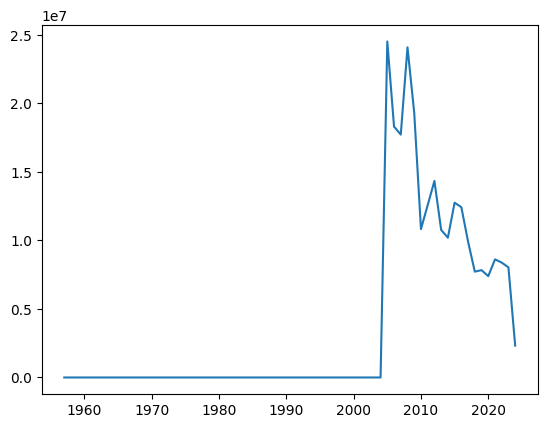

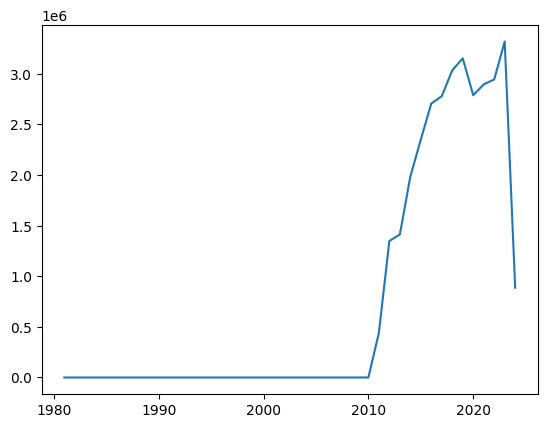

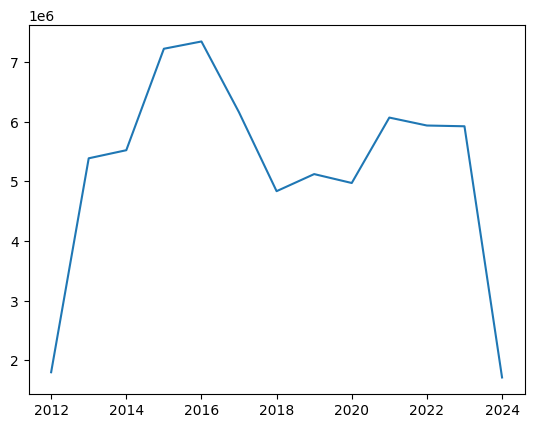

In [7]:
get_plot_total_wins_by_year(lotto_count_winnings_by_year)
get_plot_total_wins_by_year(mini_lotto_count_winnings_by_year)
get_plot_total_wins_by_year(lotto_plus_count_winnings_by_year)

In [8]:
def get_plot_win_type_by_year(data) -> None:
    x = data["year"]
    
    szostka_count = data["szostka_count"]
    plt.subplot(2, 2, 1)
    plt.plot(x, szostka_count)
    plt.title("Szóstka")
    
    piatka_count = data["piatka_count"]
    plt.subplot(2, 2, 2)
    plt.plot(x, piatka_count)
    plt.title("Piątka")
    
    czworka_count = data["czworka_count"]
    plt.subplot(2, 2, 3)
    plt.plot(x, czworka_count)
    plt.title("Czwórka")
    
    trojka_count = data["trojka_count"]
    plt.subplot(2, 2, 4)
    plt.plot(x, trojka_count)
    plt.title("Trójka")
    
    plt.show()

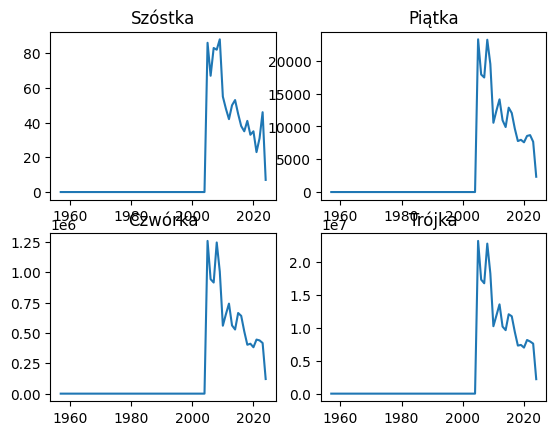

In [9]:
get_plot_win_type_by_year(lotto_count_winnings_by_year)

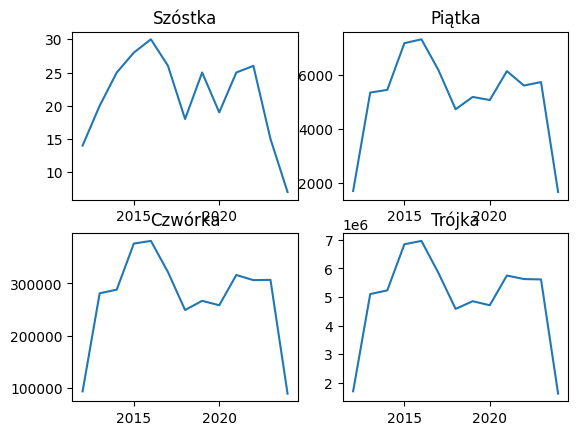

In [10]:
get_plot_win_type_by_year(lotto_plus_count_winnings_by_year)

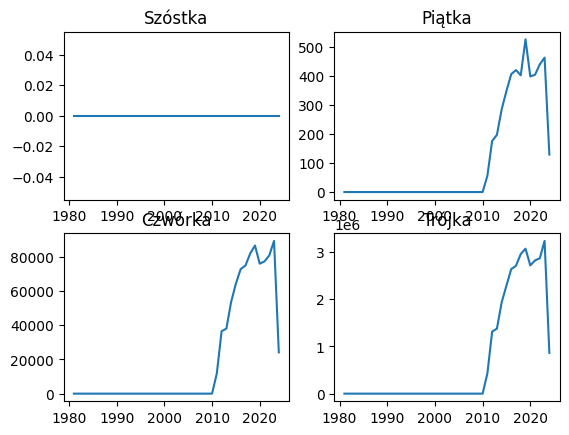

In [11]:
get_plot_win_type_by_year(mini_lotto_count_winnings_by_year)

In [12]:
def get_average_win_value_by_year(dataset) -> None:
    dataset['date'] = pd.to_datetime(dataset['date'], format='%d-%m-%Y')    
    dataset['year'] = dataset['date'].dt.year
    
    dataset['szostka_total'] = dataset['szostka_count'] * dataset['szostka_value']
    dataset['piatka_total'] = dataset['piatka_count'] * dataset['piatka_value']
    dataset['czworka_total'] = dataset['czworka_count'] * dataset['czworka_value']
    dataset['trojka_total'] = dataset['trojka_count'] * dataset['trojka_value']
    
    result = dataset.groupby('year').agg({
        'szostka_total': 'sum',
        'piatka_total': 'sum',
        'czworka_total': 'sum',
        'trojka_total': 'sum',
        'szostka_count': 'sum',
        'piatka_count': 'sum',
        'czworka_count': 'sum',
        'trojka_count': 'sum'
    }).reset_index()

    result['szostka_avg'] = result['szostka_total'] / result['szostka_count']
    result['piatka_avg'] = result['piatka_total'] / result['piatka_count']
    result['czworka_avg'] = result['czworka_total'] / result['czworka_count']
    result['trojka_avg'] = result['trojka_total'] / result['trojka_count']

    total = result['szostka_total'] + result['piatka_total'] + result['czworka_total'] + result['trojka_total']
    count = result['szostka_count'] + result['piatka_count'] + result['czworka_count'] + result['trojka_count']

    result["total_avg"] = total / count
    
    return result

In [13]:
def get_plot_average_price_value_by_year(data, avg_type) -> None:

    x = data["year"]
    y = data[avg_type]

    plt.plot(x, y)

    plt.show()
    

In [14]:
lotto_average_win_value_by_year = get_average_win_value_by_year(lotto)

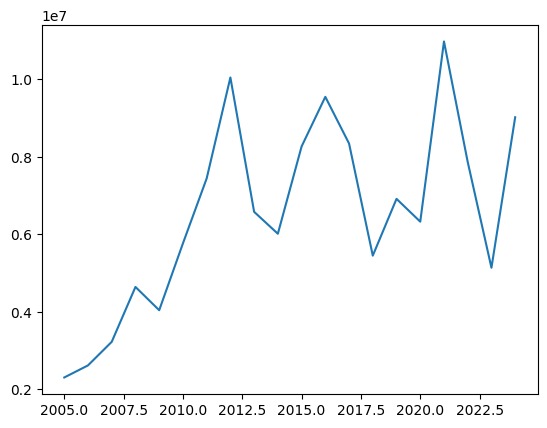

In [15]:
get_plot_average_price_value_by_year(lotto_average_win_value_by_year, "szostka_avg")

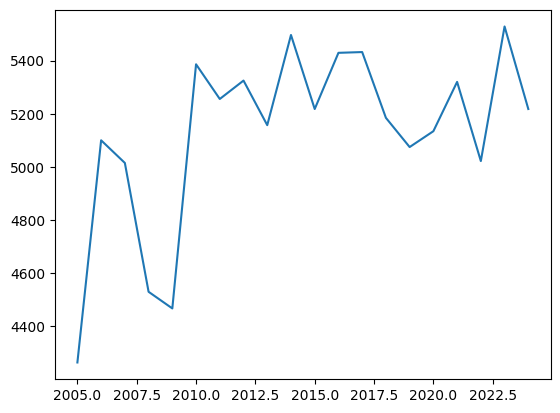

In [16]:
get_plot_average_price_value_by_year(lotto_average_win_value_by_year, "piatka_avg")

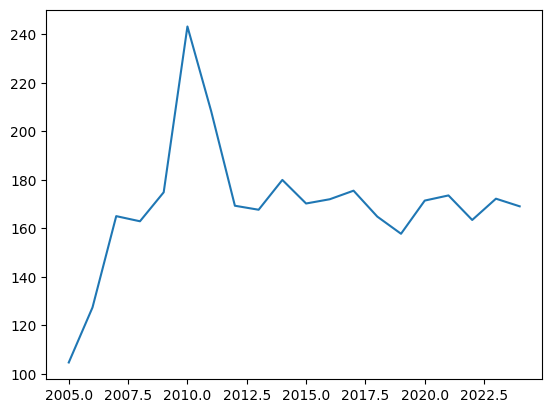

In [17]:
get_plot_average_price_value_by_year(lotto_average_win_value_by_year, "czworka_avg")

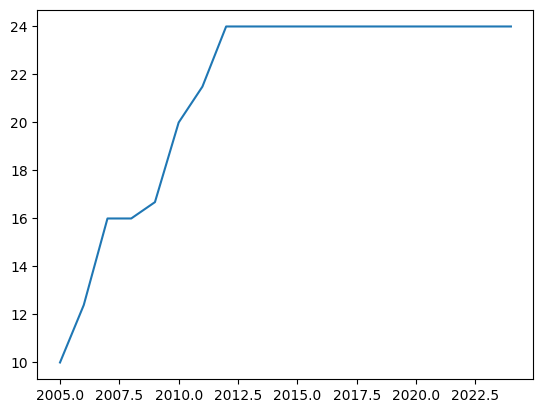

In [18]:
get_plot_average_price_value_by_year(lotto_average_win_value_by_year, "trojka_avg")

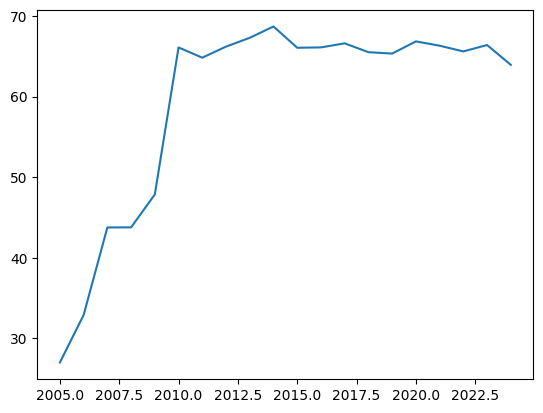

In [19]:
get_plot_average_price_value_by_year(lotto_average_win_value_by_year, "total_avg")

In [20]:
lotto_plus_average_win_value_by_year = get_average_win_value_by_year(lotto_plus)

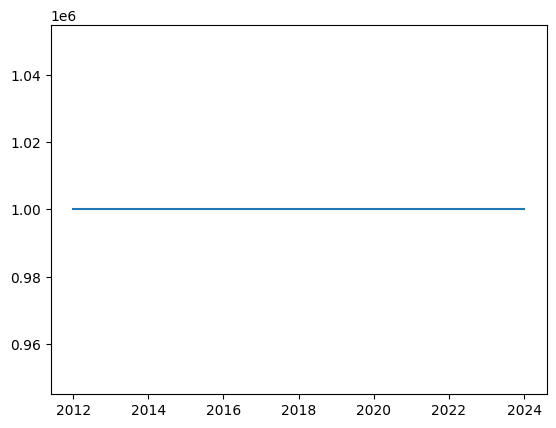

In [21]:
get_plot_average_price_value_by_year(lotto_plus_average_win_value_by_year, "szostka_avg")

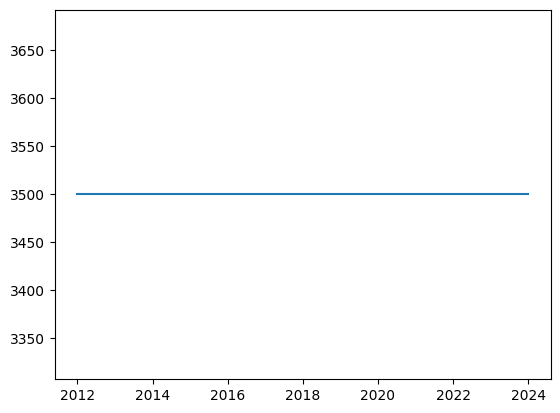

In [22]:
get_plot_average_price_value_by_year(lotto_plus_average_win_value_by_year, "piatka_avg")

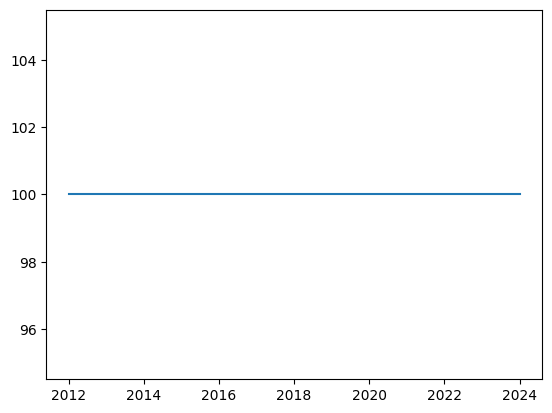

In [23]:
get_plot_average_price_value_by_year(lotto_plus_average_win_value_by_year, "czworka_avg")

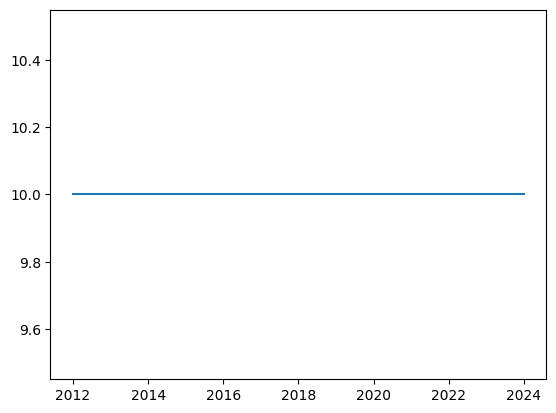

In [24]:
get_plot_average_price_value_by_year(lotto_plus_average_win_value_by_year, "trojka_avg")

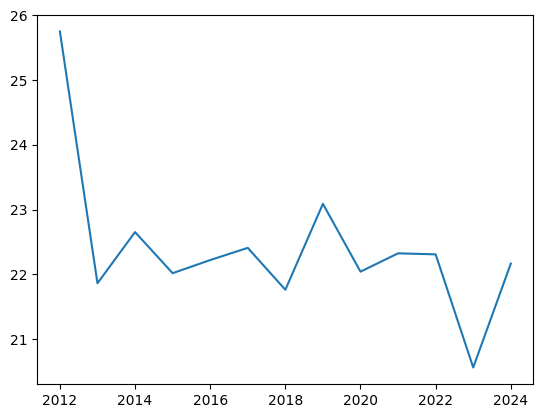

In [25]:
get_plot_average_price_value_by_year(lotto_plus_average_win_value_by_year, "total_avg")

In [26]:
min_lotto_average_win_value_by_year = get_average_win_value_by_year(mini_lotto)

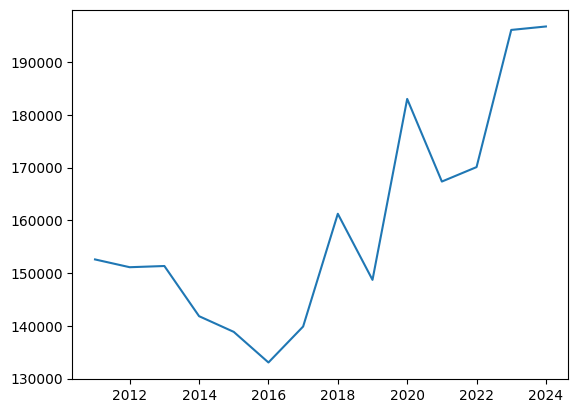

In [27]:
get_plot_average_price_value_by_year(min_lotto_average_win_value_by_year, "piatka_avg")

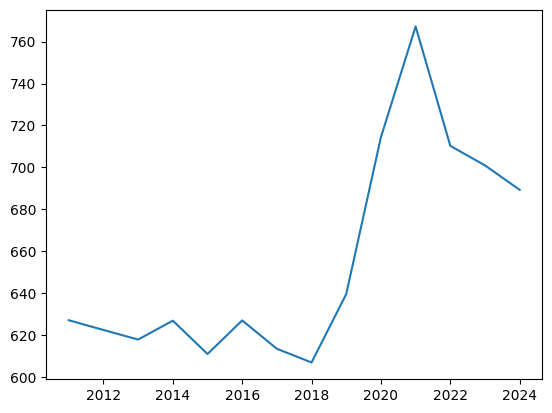

In [28]:
get_plot_average_price_value_by_year(min_lotto_average_win_value_by_year, "czworka_avg")

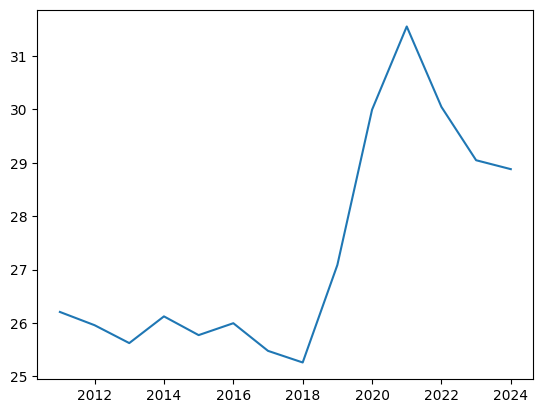

In [29]:
get_plot_average_price_value_by_year(min_lotto_average_win_value_by_year, "trojka_avg")

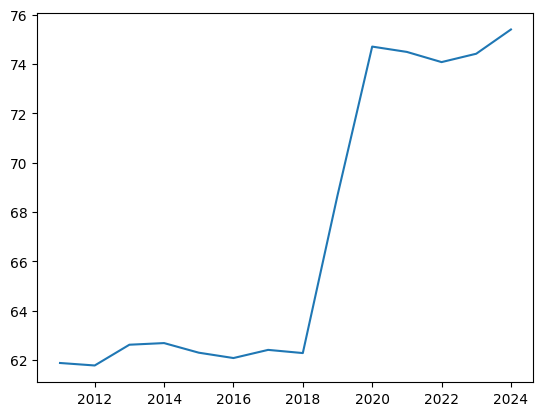

In [30]:
get_plot_average_price_value_by_year(min_lotto_average_win_value_by_year, "total_avg")